In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

DIR = './Data/'

In [2]:
acc_cols = ['accident_index','longitude', 'latitude', 'date']
acc_df = pd.read_csv(DIR+'acc_year_filtered.csv', usecols = acc_cols)
pubs_df = pd.read_csv(DIR+'pubs_cleaned_fil.csv')
vehicles_df = pd.read_csv(DIR+'vehicles_col_filtered.csv')

In [4]:
#filter out accidents in 2020
acc_df['date'] = pd.to_datetime(acc_df['date'], infer_datetime_format=True)
acc_2020 = acc_df.loc[acc_df['date'].dt.year == 2020]
acc_2019 = acc_df.loc[acc_df['date'].dt.year == 2019]

In [5]:
#filter out e-scooter accidents
vehicles_2020 = vehicles_df.loc[vehicles_df['accident_index'].isin(acc_2020.accident_index.values)]
e_scooters = vehicles_2020.loc[vehicles_2020.vehicle_type == 90]
e_acc = pd.merge(e_scooters, acc_2020, how='inner')

In [45]:
# filter out non-e-scooter accidents
non_e_scooters = vehicles_2020.loc[vehicles_2020.vehicle_type != 90]
non_e_acc_2020 = pd.merge(non_e_scooters, acc_2020, how='inner')

In [50]:
#filter out accidents in 2019
acc_2019 = acc_df.loc[(acc_df['date'].dt.year==2019)]
vehicles_2019 = vehicles_df.loc[vehicles_df['accident_index'].isin(acc_2019.accident_index.values)]
all_acc_2019 = pd.merge(vehicles_2019, acc_2019, how='inner')

In [6]:
# filter pubs around which there were e-scooter accidents
from tqdm import tqdm 

pubs_nearby = []
for index, row in tqdm(e_acc[:].iterrows(), total=e_acc[:].shape[0]):
    # print(row.latitude, row.longitude)
    lat = row.latitude
    long = row.longitude
    pubs_nearby.extend(pubs_df[((pubs_df.latitude <=  lat + 0.0069) & (pubs_df.latitude >= lat - 0.0069)) & 
                ((pubs_df.longitude <= long + 0.022) & (pubs_df.longitude  >= long - 0.022))].fas_id.values)


pubs_filtered = pubs_df[pubs_df.fas_id.isin(pubs_nearby)]
len(pubs_nearby),len(set(pubs_nearby)) ,e_acc.shape, pubs_filtered.shape

100%|██████████| 1185/1185 [00:02<00:00, 511.65it/s]


(23070, 10695, (1185, 6))

In [ ]:
# number of accidents around each pub in 2020

pubs_filtered = pubs_df[pubs_df.fas_id.isin(pubs_nearby)]

for index, row in tqdm(pubs_filtered[:].iterrows(), total=pubs_filtered[:].shape[0]):
    lat = row.latitude
    long = row.longitude
    # count no. acc within ~1km radius
    pubs_filtered.loc[index,'e_acc_2020_count'] = e_acc[((e_acc.latitude <=  lat + 0.0069) & (e_acc.latitude >= lat - 0.0069)) & 
                ((e_acc.longitude <= long + 0.022) & (e_acc.longitude  >= long - 0.022))].shape[0]

    pubs_filtered.loc[index,'non_e_acc_2020_count'] = non_e_acc_2020[((non_e_acc_2020.latitude <=  lat + 0.0069) & (non_e_acc_2020.latitude >= lat - 0.0069)) & 
                ((non_e_acc_2020.longitude <= long + 0.022) & (non_e_acc_2020.longitude  >= long - 0.022))].shape[0]

    pubs_filtered.loc[index,'acc_2019_count'] = all_acc_2019[((all_acc_2019.latitude <=  lat + 0.0069) & (all_acc_2019.latitude >= lat - 0.0069)) & 
                ((all_acc_2019.longitude <= long + 0.022) & (all_acc_2019.longitude  >= long - 0.022))].shape[0]


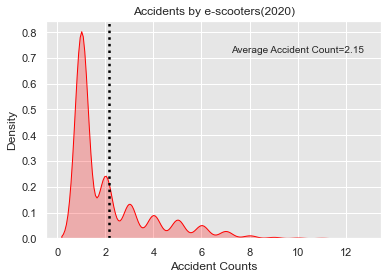

In [56]:
sns.set_theme()
# sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

x = pubs_filtered['e_acc_2020_count'].values

ax = sns.kdeplot(pubs_filtered['e_acc_2020_count'], shade=True, color="red")
ax.text(10, 0.72, 'Average Accident Count=2.15', ha='center', fontsize=10)
ax.set(xlabel ="Accident Counts", ylabel = "Density", title ='Accidents by e-scooters(2020)')
plt.axvline(x=pubs_filtered['e_acc_2020_count'].mean(),
            color='black',
            ls=':', 
            lw=2.5)
plt.show()

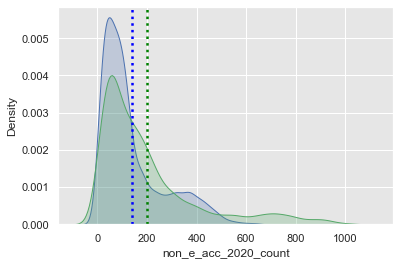

In [58]:
# sns.set_theme()
# sns.set_context("talk")
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

ax = sns.kdeplot(pubs_filtered['non_e_acc_2020_count'], shade=True, color="b")
ax = sns.kdeplot(pubs_filtered['acc_2019_count'], shade=True, color="g")
plt.axvline(x=pubs_filtered['non_e_acc_2020_count'].mean(),
            color='blue',
            ls=':', 
            lw=2.5)
plt.axvline(x=pubs_filtered['acc_2019_count'].mean(),
            color='green',
            ls=':', 
            lw=2.5)